In [3]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load Configuration
def load_config(config_path):
    with open(config_path, "r") as file:
        return json.load(file)

# Load and Preprocess Data
def preprocess_data(data_path, kpi_column):
    df = pd.read_csv(data_path)
    df["DATE"] = pd.to_datetime(df["YEAR"].astype(str) + "-" + df["MONTH"].astype(str) + "-01") + pd.offsets.MonthEnd(0)
    df = df[["DATE", kpi_column]].groupby("DATE").sum().reset_index()
    df.sort_values("DATE", inplace=True)
    return df

# Forecasting Function
def forecast_kpi(df, kpi_column, forecast_periods=12, confidence_interval=0.95):
    df.set_index("DATE", inplace=True)
    
    # Fit SARIMA model
    model = SARIMAX(df[kpi_column], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit()
    
    # Forecasting
    forecast_results = model_fit.get_forecast(steps=forecast_periods)
    forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_periods, freq="M")
    forecast_mean = forecast_results.predicted_mean
    confidence_intervals = forecast_results.conf_int(alpha=1 - confidence_interval)
    
    # Plot Forecast
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df[kpi_column], label="Historical KPI", color="blue")
    plt.plot(forecast_index, forecast_mean, label="Forecasted KPI", color="red", linestyle="dashed")
    plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color="pink", alpha=0.3, label=f"{int(confidence_interval*100)}% Confidence Interval")
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel("KPI Value")
    plt.title("KPI Forecast with Confidence Interval")
    plt.show()
    
    return {
        "DATE": forecast_index.values,
        "Forecast": forecast_mean.values,
        "Lower Bound": confidence_intervals.iloc[:, 0].values,
        "Upper Bound": confidence_intervals.iloc[:, 1].values
    }



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/envs/llm_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/llm_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/llm_env/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
/opt/anaconda3/envs/llm_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index i

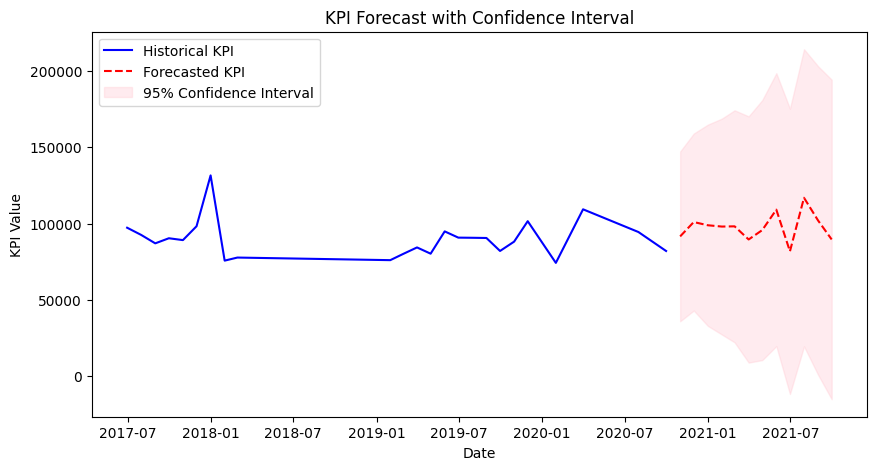

{'DATE': array(['2020-10-31T00:00:00.000000000', '2020-11-30T00:00:00.000000000',
       '2020-12-31T00:00:00.000000000', '2021-01-31T00:00:00.000000000',
       '2021-02-28T00:00:00.000000000', '2021-03-31T00:00:00.000000000',
       '2021-04-30T00:00:00.000000000', '2021-05-31T00:00:00.000000000',
       '2021-06-30T00:00:00.000000000', '2021-07-31T00:00:00.000000000',
       '2021-08-31T00:00:00.000000000', '2021-09-30T00:00:00.000000000'],
      dtype='datetime64[ns]'), 'Forecast': array([ 91668.12562759, 101068.63749172,  98963.36140113,  98108.31562835,
        98262.64762257,  89649.92728621,  95796.21059427, 109181.05730005,
        81874.64106425, 116964.82506471, 102093.38616595,  89662.76624233]), 'Lower Bound': array([ 36053.62952047,  43088.35820922,  33047.98662367,  27379.02804703,
        22257.09990569,   8993.07629913,  10640.9636844 ,  19790.24071396,
       -11573.36135415,  19633.52174549,   1026.07552885, -15006.62098449]), 'Upper Bound': array([147282.62173471, 1

In [4]:
config = load_config("config.json")
df = preprocess_data("Warehouse_and_Retail_Sales_enhanced.csv", "RETAIL SALES")
forecast_results = forecast_kpi(df, "RETAIL SALES", forecast_periods=12)
print(forecast_results)